## Simple XOR example using Tensorflow

**Description**: The 'Hello World' of practical Tensorflow examples.

**Created**: 4/2018

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

### Prepare Data

In [2]:
# XOR dataset
training_data = np.array([[0, 0], [0, 1], [1,0], [1, 1]])
training_targets = np.array([[0], [1], [1], [0]])

### Build network

In [3]:
# network shape
n_input = training_data.shape[1]
n_hidden = 5
n_classes = 1

# hyperparameters
training_epochs = 100
learning_rate = 0.1
display_step = 10

# model filename for save/load
model_filename = './tf_model.ckpt'

In [4]:
# Clear default graph
tf.reset_default_graph()

# Create tensorflow input placeholders
tf_inputs = tf.placeholder(shape=[None, n_input], dtype=tf.float32, name='inputs')
tf_targets = tf.placeholder(shape=[None, n_classes], dtype=tf.float32, name='targets')

# Create network
tf_hidden = tf.layers.dense(tf_inputs, n_hidden, activation=tf.nn.sigmoid, name='tf_hidden')
tf_output = tf.layers.dense(tf_hidden, n_classes, activation=tf.nn.sigmoid, name='tf_output')

tf_loss = tf.reduce_mean((tf_output - tf_targets)**2) #MSE
tf_train = tf.train.AdamOptimizer(learning_rate).minimize(tf_loss)

# Alternatively try with GradientDescentOptimizer, RMSPropOptimizer; use hyper-parameter table within 'Observations' section

### Train Network

In [5]:
# Initializing the variables
init = tf.global_variables_initializer()

# For saving weights after training
saver = tf.train.Saver()

# Train
with tf.Session() as sess:
    loss_data, epoch_data = [], []
    
    sess.run(init)

    # Training cycle
    for epoch in range(1, training_epochs+1):
        # Train the graph
        _, l = sess.run([tf_train, tf_loss], feed_dict={ tf_inputs : training_data,
                                                         tf_targets : training_targets})
        
        # Every 'display_step' epochs, display the current loss
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch), "loss={:.6f}".format(l), end='\r')
            
            # for graphing 
            loss_data.append(l)
            epoch_data.append(epoch)
    
    # Save graph and weights
    saver.save(sess, model_filename)

### Plot

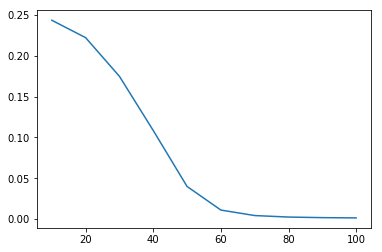

In [6]:
### Plot loss over epochs
plt.plot(epoch_data, loss_data)

### Test

In [7]:
# load weights
with tf.Session() as sess:
    # Restore graph and weights
    saver.restore(sess, model_filename)

    # Test
    prediction = sess.run([tf_output], feed_dict={tf_inputs : training_data})
    
    # Accuracy
    accuracy = 1 - np.mean(abs(training_targets - prediction))
    print('Accuracy: {:.4f}%'.format(accuracy * 100))

INFO:tensorflow:Restoring parameters from ./tf_model.ckpt
Accuracy: 96.2997%


## Observations

- Using Adam, RMSProp optimizers with same learning rate can learn at similar accuracy within significantly fewer epochs.

#### Optimizer performance

| Optimizer | Epochs | Accuracy |
| --------- | ------ | -------- |
| Adam | 100 | ~ 95% |
| GradientDescent | 20,000 | ~ 95% |
| RMSProp | 200 | ~ 97.5% |